##  Data Integrity Validation for the SOurce FIle V.1

Setting up environment and importing libraries

In [2]:
import sys
import csv
import os
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import datetime

importing data from the file by specifying the location

In [3]:
print(os.listdir('./Inputfile'))


dir = os.listdir('./Inputfile')
data_file_path = pd.read_csv('./Inputfile/data_engineering.csv')
data_file_path.head()

['data_engineering.csv']


,measurement_datetime,device_identifier,bytes_total,bytes_per_second,successes,failures,fetch_time
0,2019-01-05 04:57:21.000,45ce9eb2-2c36-11e7-b97c-0cc47a6bebee,369170496,36916699.0,1,0,10000095
1,2019-01-05 23:34:36.000,7b8c5fb3-9f33-11e8-ae05-002590e569f4,117293792,11717693.0,1,0,10009973
2,2019-01-05 21:15:39.000,0bebf443-9cd8-11e8-ae05-002590e569f4,372999544,37263380.0,1,0,10009815
3,2019-01-05 20:02:33.000,45ce9eb2-2c36-11e7-b97c-0cc47a6bebee,281369568,28136712.0,1,0,10000087
4,2019-01-05 06:26:41.000,485ad193-2c35-11e7-b97c-0cc47a6bebee,371844952,37181822.0,1,0,10000719


Validating the date time format

In [124]:
# load file
with open('./Inputfile/data_engineering.csv') as f:
    # split file into lines
    lines = f.readlines()

    # replace new-line character
    lines = [x.replace("\n", "") for x in lines]

    # extract the header
    header = lines[0]

    # extract rows
    rows = lines[1:]


In [126]:
 # setting default value for every row
#for rowNumber, row in enumerate(rows, 1):
   # columns = lines.str.split(",")


Validating the Date format is consistant

In [115]:
from datetime import datetime

print(datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3])

2019-07-24 06:01:50.384


In [119]:
#2019-01-05 04:57:21.000
from datetime import datetime
def isDateValid(date, pattern = '%Y-%m-%d %H:%M:%S.%f'[:-3]):
    try:
        datetime.strftime(date, pattern)
        return True
    except ValueError:
        return False

In [ ]:
data = list(data_file_path)

columns = defaultdict(list)
with open('./Inputfile/data_engineering.csv') as f:
    reader = csv.reader(f, delimiter=',')
    headers = next(reader)
    column_nums = range(len(headers)) # Do NOT change to xrange
    for row in reader:
        for i in column_nums:
            columns[headers[i]].append(row[i])
# Following line is only necessary if you want a key error for invalid column names
columns = dict(columns)

columns='measurement_datetime'
gotValidDate = False
# loop over every column
for column in columns:
            # check if the column got a valid date
    if isDateValid(columns):
        gotValidDate = True

        # if at least one out of all columns in that row got a valid date
        # the row number gets printed
if gotValidDate:
    print(f"Row {rowNumber} got at least one valid date")

Checking file data for the basic stats to identify and sumarise any  anomalies

In [18]:
data_file_path.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bytes_total,348767.0,1.728626e+08,2.118417e+08,0.0,36771840.0,74947712.0,363655064.0,1.178104e+09
bytes_per_second,348767.0,1.781403e+07,2.088762e+07,-37264688.0,4633465.0,8576649.0,36216386.0,1.177003e+08
successes,348767.0,9.632391e-01,1.881746e-01,0.0,1.0,1.0,1.0,1.000000e+00
failures,348767.0,3.676667e-02,1.881887e-01,0.0,0.0,0.0,0.0,1.000000e+00
fetch_time,348767.0,8.488068e+06,2.750067e+06,0.0,10000049.0,10000265.0,10009758.0,1.033556e+07


validating the data types and the column headers


In [44]:
for dtype in data_file_path.dtypes.iteritems():
    print(dtype)

('measurement_datetime', dtype('O'))
('device_identifier', dtype('O'))
('bytes_total', dtype('int64'))
('bytes_per_second', dtype('float64'))
('successes', dtype('int64'))
('failures', dtype('int64'))
('fetch_time', dtype('int64'))


In [69]:
print (header)

"measurement_datetime","device_identifier","bytes_total","bytes_per_second","successes","failures","fetch_time"


In [43]:
dict(data_file_path)

{'measurement_datetime': 0         2019-01-05 04:57:21.000
 1         2019-01-05 23:34:36.000
 2         2019-01-05 21:15:39.000
 3         2019-01-05 20:02:33.000
 4         2019-01-05 06:26:41.000
 5         2019-01-05 10:57:30.000
 6         2019-01-05 22:30:47.000
 7         2019-01-05 19:16:57.000
 8         2019-01-05 06:34:27.000
 9         2019-01-05 14:59:14.000
 10        2019-01-05 02:58:22.000
 11        2019-01-05 14:58:22.000
 12        2019-01-05 12:38:40.000
 13        2019-01-05 09:40:14.000
 14        2019-01-05 09:41:04.000
 15        2019-01-05 20:38:46.000
 16        2019-01-05 23:38:53.000
 17        2019-01-05 12:24:35.000
 18        2019-01-05 06:25:16.000
 19        2019-01-05 08:17:02.000
 20        2019-01-05 11:20:47.000
 21        2019-01-05 05:20:34.000
 22        2019-01-05 18:02:28.000
 23        2019-01-05 14:02:24.000
 24        2019-01-05 22:02:17.000
 25        2019-01-05 20:01:57.000
 26        2019-01-05 11:57:23.000
 27        2019-01-05 23:02:37.

Summarising the data and stats

In [72]:
# Group data
grouped_data = data_file_path.groupby('bytes_total')


In [73]:
# Summary statistics for all numeric columns
grouped_data.describe()


bytes_per_second                                          \
                       count          mean          std          min   
bytes_total                                                            
0                     1322.0  0.000000e+00     0.000000          0.0   
19                       2.0  4.000000e+00     0.000000          4.0   
2899                     3.0  2.900000e+02     0.000000        290.0   
8697                     1.0  8.700000e+02          NaN        870.0   
20179                    1.0  2.018000e+03          NaN       2018.0   
23168                    4.0  2.314000e+03     0.000000       2314.0   
43219                    2.0  4.322000e+03     0.000000       4322.0   
54777                    2.0  5.478000e+03     0.000000       5478.0   
60537                    1.0  6.054000e+03          NaN       6054.0   
66608                    1.0  6.654000e+03          NaN       6654.0   
106617                   1.0  1.066200e+04          NaN      10662.0   
176656                   2.0  1.764800e+04     0.000000      17648.0   
180057                   2.0  1.800500e+04     0.000000      18005.0   
187200                   2.0  1.872000e+04     0.000000      18720.0   
214579                   2.0  2.145800e+04     0.000000      21458.0   
232400                   2.0  2.321700e+04     0.000000      23217.0   
246259                   3.0  2.462600e+04     0.000000      24626.0   
256296                   4.0  2.562900e+04     0.000000      25629.0   
257760                   3.0  2.577600e+04     0.000000      25776.0   
285120                   2.0  2.848400e+04     0.000000      28484.0   
301184                   4.0  3.008800e+04     0.000000      30088.0   
305337                   1.0  3.053300e+04          NaN      30533.0   
324000                   2.0  3.240000e+04     0.000000      32400.0   
325440                   2.0  3.254400e+04     0.000000      32544.0   
351360                   2.0  7.013100e+04     0.000000      70131.0   
387800                   2.0  3.874100e+04     0.000000      38741.0   
390600                   2.0  3.902100e+04     0.000000      39021.0   
424800                   2.0  4.243800e+04     0.000000      42438.0   
449400                   2.0  4.489500e+04     0.000000      44895.0   
450720                   2.0  8.996400e+04     0.000000      89964.0   
...                      ...           ...          ...          ...   
1178004472               1.0  1.176855e+08          NaN  117685527.0   
1178005920               1.0  1.176835e+08          NaN  117683509.0   
1178006712               1.0  1.176827e+08          NaN  117682671.0   
1178007368               2.0  1.176796e+08     0.000000  117679633.0   
1178009488               2.0  1.176845e+08     0.000000  117684476.0   
1178012728               2.0  1.176823e+08     0.000000  117682272.0   
1178014624               2.0  1.176840e+08     0.000000  117684026.0   
1178016056               2.0  1.176840e+08     0.000000  117683957.0   
1178016400               3.0  1.176822e+08     0.000000  117682216.0   
1178018624               2.0  1.176835e+08     0.000000  117683473.0   
1178021520               2.0  1.176828e+08     0.000000  117682845.0   
1178023296               2.0  1.176786e+08     0.000000  117678638.0   
1178026192               2.0  1.176838e+08     0.000000  117683806.0   
1178026880               1.0  1.176842e+08          NaN  117684204.0   
1178027432               2.0  1.176831e+08     0.000000  117683071.0   
1178030536               2.0  1.176732e+08     0.000000  117673166.0   
1178031328               1.0  1.176831e+08          NaN  117683061.0   
1178034328               2.0  1.176832e+08     0.000000  117683196.0   
1178037776               1.0  1.176821e+08          NaN  117682083.0   
1178040672               2.0  1.176869e+08     0.000000  117686922.0   
1178042120               2.0  1.176848e+08     0.000000  117684797.0   
1178045032               3.0  1.176831e+08     0.000

In [74]:
# Provide the mean for each numeric column
grouped_data.mean()

,bytes_per_second,successes,failures,fetch_time
bytes_total,,,,
0,0.000000e+00,0.0,1.0,1.233051e+05
19,4.000000e+00,0.0,1.0,5.000136e+06
2899,2.900000e+02,0.0,1.0,1.000015e+07
8697,8.700000e+02,0.0,1.0,1.000018e+07
20179,2.018000e+03,0.0,1.0,1.000010e+07
23168,2.314000e+03,1.0,0.0,1.001000e+07
43219,4.322000e+03,0.0,1.0,1.000014e+07
54777,5.478000e+03,0.0,1.0,1.000013e+07
60537,6.054000e+03,0.0,1.0,1.000012e+07


In [76]:
# Count the number of samples 
bytes_total_count = data_file_path.groupby('bytes_total')['device_identifier'].count()
print(bytes_total_count)
data_file_path.groupby('bytes_total')['device_identifier'].count()[0]

bytes_total
0             1322
19               2
2899             3
8697             1
20179            1
23168            4
43219            2
54777            2
60537            1
66608            1
106617           1
176656           2
180057           2
187200           2
214579           2
232400           2
246259           3
256296           4
257760           3
285120           2
301184           4
305337           1
324000           2
325440           2
351360           2
387800           2
390600           2
424800           2
449400           2
450720           2
              ... 
1178004472       1
1178005920       1
1178006712       1
1178007368       2
1178009488       2
1178012728       2
1178014624       2
1178016056       2
1178016400       3
1178018624       2
1178021520       2
1178023296       2
1178026192       2
1178026880       1
1178027432       2
1178030536       2
1178031328       1
1178034328       2
1178037776       1
1178040672       2
1178042120       2


1322

In [79]:
# Count the number of samples bytes_per_second
bytes_total_count = data_file_path.groupby('fetch_time')['device_identifier'].count()
print(bytes_total_count)
data_file_path.groupby('fetch_time')['device_identifier'].count()[0]

fetch_time
0           2429
677524         3
677779         1
677839         2
679075         2
679900         3
683785         2
684396         2
689187         1
690142         3
690273         1
708752         3
710187         2
711080         1
715995         2
721705         3
727140         3
735006         3
764630         2
770118         1
775490         2
782244         2
784417         2
788216         1
792487         1
793523         3
798784         3
814055         2
816271         3
819470         3
            ... 
10046257       4
10047264       4
10049511       4
10050603       2
10050720       6
10052309       4
10052433       2
10053895       4
10056408       2
10056877       3
10057551       4
10059803       2
10068340       4
10070548       2
10075213       4
10075485       1
10075712       6
10075903       4
10076928       2
10081430       2
10099838       3
10104634       4
10106453       2
10118492       1
10123780       1
10125413       3
10126016       3
101

2429

sanity check for the 'NOT NULL' column with reference to the destination schema requirement

In [45]:

data_file_path[data_file_path['measurement_datetime'].isnull()]


,measurement_datetime,device_identifier,bytes_total,bytes_per_second,successes,failures,fetch_time


In [46]:
data_file_path[data_file_path['device_identifier'].isnull()]



,measurement_datetime,device_identifier,bytes_total,bytes_per_second,successes,failures,fetch_time


In [47]:
data_file_path[data_file_path['bytes_total'].isnull()]


,measurement_datetime,device_identifier,bytes_total,bytes_per_second,successes,failures,fetch_time


In [48]:
data_file_path[data_file_path['bytes_per_second'].isnull()]



,measurement_datetime,device_identifier,bytes_total,bytes_per_second,successes,failures,fetch_time


In [49]:

data_file_path[data_file_path['successes'].isnull()]


,measurement_datetime,device_identifier,bytes_total,bytes_per_second,successes,failures,fetch_time


In [51]:
data_file_path[data_file_path['failures'].isnull()]



,measurement_datetime,device_identifier,bytes_total,bytes_per_second,successes,failures,fetch_time


In [52]:
data_file_path[data_file_path['fetch_time'].isnull()]

,measurement_datetime,device_identifier,bytes_total,bytes_per_second,successes,failures,fetch_time


Identifying status of the Null values with in the data

In [61]:
count_nan = len(data_file_path) - data_file_path.count()
print(count_nan)

measurement_datetime    0
device_identifier       0
bytes_total             0
bytes_per_second        0
successes               0
failures                0
fetch_time              0
dtype: int64


In [64]:
data_file_path.isnull().sum(axis = 0)
#data_file_path.isnull().sum(axis = 1)

measurement_datetime    0
device_identifier       0
bytes_total             0
bytes_per_second        0
successes               0
failures                0
fetch_time              0
dtype: int64

Reporting Data

In [4]:
data_file_path.head()

,measurement_datetime,device_identifier,bytes_total,bytes_per_second,successes,failures,fetch_time
0,2019-01-05 04:57:21.000,45ce9eb2-2c36-11e7-b97c-0cc47a6bebee,369170496,36916699.0,1,0,10000095
1,2019-01-05 23:34:36.000,7b8c5fb3-9f33-11e8-ae05-002590e569f4,117293792,11717693.0,1,0,10009973
2,2019-01-05 21:15:39.000,0bebf443-9cd8-11e8-ae05-002590e569f4,372999544,37263380.0,1,0,10009815
3,2019-01-05 20:02:33.000,45ce9eb2-2c36-11e7-b97c-0cc47a6bebee,281369568,28136712.0,1,0,10000087
4,2019-01-05 06:26:41.000,485ad193-2c35-11e7-b97c-0cc47a6bebee,371844952,37181822.0,1,0,10000719


Highlighting data variance

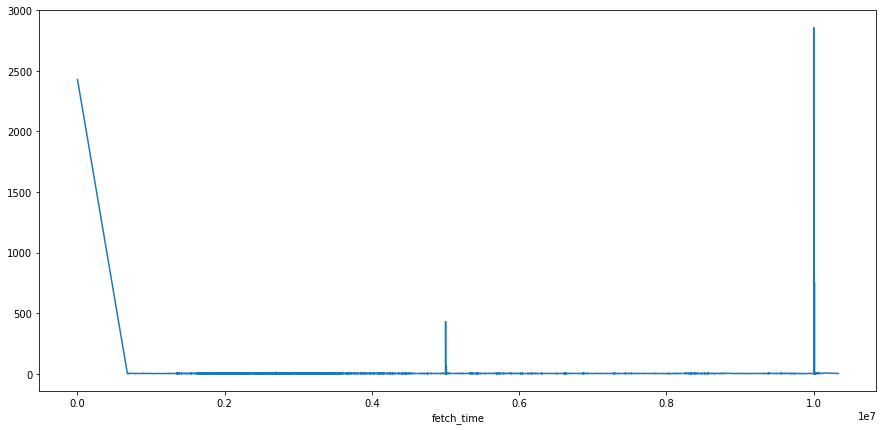

In [29]:
df_plot = data_file_path['fetch_time'].copy()
df_device =  data_file_path.groupby('measurement_datetime').count()

fig, ax = plt.subplots(figsize=(15,7))
data_file_path.groupby(['fetch_time']).count()['device_identifier'].plot(ax=ax)

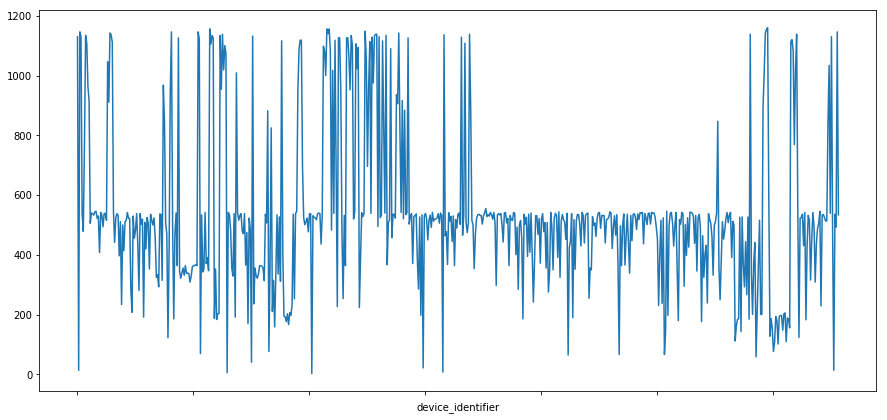

In [31]:
fig, ax = plt.subplots(figsize=(15,7))
data_file_path.groupby(['device_identifier']).count()['successes'].plot(ax=ax)

In [ ]:
d = data_file_path[['device_identifier', 'bytes_total']].drop_duplicates()
#measurement_datetime

plt.plot(d['device_identifier'], d['bytes_total'], 'o')
plt.show()

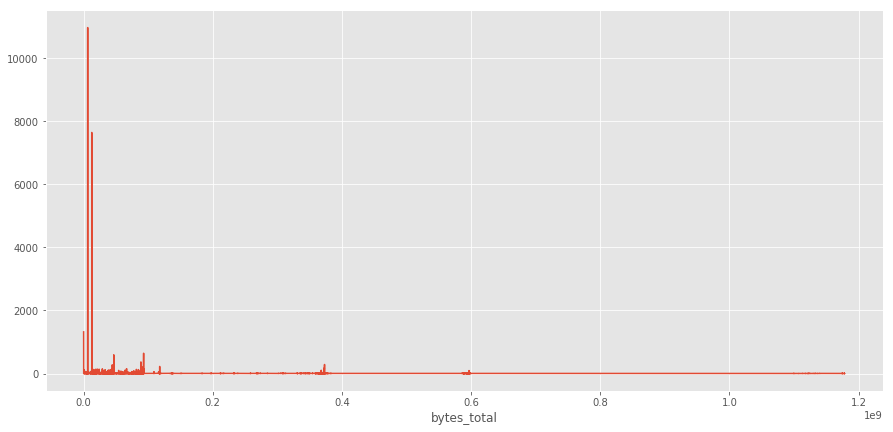

In [61]:
fig, ax = plt.subplots(figsize=(15,7))

data_file_path.groupby(['bytes_total']).count()['measurement_datetime'].plot(ax=ax)

In [ ]:
# Plot mortality per year:
plt.bar(data_file_path['measurement_datetime'], data_file_path['device_identifier'])
# Set plot title
plt.title('Fetch time')
# Set the "xticks", for barplots, this is the labels on your x axis 
plt.xticks(data_file_path['measurement_datetime'], rotation=90)
# Set the name of the x axis
plt.xlabel('measurement_datetime')
# Set the name of the y axis
plt.ylabel('device_identifier')
# tight_layout makes it nicer for reading and saving
#plt.tight_layout()
# Show your plot
plt.show()